In [2]:
import torch
import torchaudio
import torchaudio.transforms as T


In [3]:
clean_path = './data/LibriSpeech/train-clean-100/19/198/19-198-0000.flac'
clean_wave, clean_rate = torchaudio.load(clean_path)
print(clean_wave.shape, clean_rate)

mixed_path = './mixed_audio_example.flac'
mixed_wave, mixed_rate = torchaudio.load(mixed_path)
print(mixed_wave.shape, mixed_rate)

torch.Size([1, 31440]) 16000
torch.Size([1, 31440]) 16000


In [6]:
N_FFT = 512  # 표준 프레임 크기인 25ms는 16000 * 0.025 = 400 샘플보다 
HOP_LENGTH = int(clean_rate * 0.01)  # 16000 Hz에서 10ms(0.01초)에 해당하는 샘플 수

spectrogram_transform = T.Spectrogram(n_fft=N_FFT, hop_length=HOP_LENGTH)

In [7]:
spectrogram_clean = spectrogram_transform(clean_wave)
print(spectrogram_clean)

tensor([[[3.1026e-03, 1.2198e-01, 1.4974e-01,  ..., 1.7071e-01,
          4.6717e-02, 2.0779e-01],
         [3.9119e-02, 1.3206e-01, 1.3602e-01,  ..., 1.3641e-01,
          1.1019e-01, 1.4344e-01],
         [2.6721e-02, 2.8555e-02, 1.2034e-02,  ..., 1.9399e-02,
          1.3387e-02, 1.0132e-02],
         ...,
         [4.6389e-05, 1.5209e-05, 1.0126e-06,  ..., 5.4661e-06,
          1.4659e-05, 8.4293e-06],
         [1.2885e-05, 1.5048e-05, 4.0547e-07,  ..., 4.4345e-06,
          2.6608e-05, 1.7560e-05],
         [3.4447e-08, 6.9586e-06, 8.9525e-07,  ..., 8.8144e-08,
          4.3850e-05, 7.8358e-05]]])


In [9]:
amplitude_to_dB_transform = T.AmplitudeToDB(stype='power')
log_spec_clean = amplitude_to_dB_transform(spectrogram_clean)
print(log_spec_clean)

tensor([[[-25.0827,  -9.1370,  -8.2466,  ...,  -7.6773, -13.3052,  -6.8238],
         [-14.0762,  -8.7923,  -8.6638,  ...,  -8.6515,  -9.5785,  -8.4333],
         [-15.7315, -15.4432, -19.1961,  ..., -17.1223, -18.7331, -19.9431],
         ...,
         [-43.3358, -48.1789, -59.9455,  ..., -52.6232, -48.3388, -50.7421],
         [-48.8993, -48.2252, -63.9204,  ..., -53.5315, -45.7498, -47.5547],
         [-74.6285, -51.5748, -60.4805,  ..., -70.5481, -43.5803, -41.0592]]])


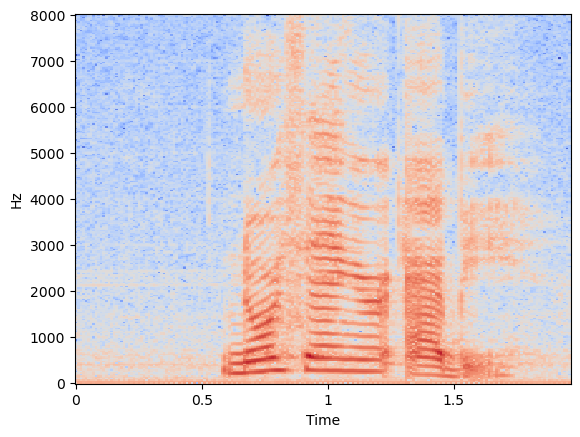

In [13]:
import librosa
import matplotlib.pyplot as plt

spec_to_visualize = log_spec_clean[0].numpy()
librosa.display.specshow(spec_to_visualize, sr=clean_rate, hop_length=HOP_LENGTH, x_axis='time', y_axis='linear')
plt.show()